<h1>Análise Exploratória e Limpeza dos Dados</h1>
<p>Para que possamos realizar uma boa análise do nosso conjunto de dados e, logo em seguida, a limpeza, devemos determinar qual é o nosso objetivo.</p>
<p>Começando pelo enunciado do projeto, temos que o objetivo é criar um modelo que seja capaz de predizer, com base no perfil do cliente e na forma de contato com cliente, se o serviço foi ou não contratado. Para isso, devemos determinar quais as características do cliente são relevantes, ou seja, quais features influenciam no comportamento da target. Posteriormente, poderemos limpar o conjunto de dados e deixá-lo pronto para o treinamento do modelo.</p>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer

In [32]:
df = pd.read_csv('./raw_data/bank_train.csv')
display(df)

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41.0,management,single,tertiary,NaN,no,4522.0,no,no,cellular,28,aug,55,1.0,-1,0.0,unknown,no
1,1,42.0,blue-collar,married,primary,NaN,yes,398.0,yes,n,unknown,16,may,251,4.0,-1,0.0,unknown,no
2,2,26.0,student,single,secondary,Lisboa,no,706.0,no,no,unknown,8,oct,118,1.0,105,2.0,other,no
3,3,54.0,management,married,tertiary,NaN,no,0.0,no,y,cellular,19,nov,307,3.0,-1,0.0,unknown,no
4,4,43.0,self-employed,married,secondary,Porto,no,918.0,yes,no,unknown,6,may,193,1.0,-1,0.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,43.0,management,married,tertiary,Lisboa,no,13851.0,yes,no,cellular,21,nov,259,1.0,-1,0.0,unknown,no
39996,39996,34.0,blue-collar,married,primary,NaN,no,357.0,yes,no,unknown,14,may,197,2.0,-1,0.0,unknown,no
39997,39997,30.0,management,single,tertiary,NaN,no,4889.0,no,no,cellular,11,aug,545,2.0,-1,0.0,unknown,yes
39998,39998,40.0,self-employed,married,tertiary,Lisboa,no,271.0,yes,no,cellular,21,nov,124,3.0,102,4.0,failure,no


<h2>Breve descrição das features presentes:</h2>
<ul>
    <li><b>id: </b>Número de identificação do cliente</li>
    <li><b>age: </b> Idade do cliente</li>
    <li><b>job: </b>Tipo de emprego do cliente</li>
    <li><b>marital: </b>Estado Civil</li>
    <li><b>education: </b>Grau de Educação</li>
    <li><b>location: </b>Localidade</li>
    <li><b>default: </b>Se o cliente possui crédito de inadimplência</li>
    <li><b>balance: </b>Balanço médio anual, em euros</li>
    <li><b>housing: </b>Se possui ou não empréstimo habitacional</li>
    <li><b>loan: </b>Se possui um empréstimo ativo</li>
    <li><b>contact: </b>Tipo de comunicação realizada (no último contato)</li>
    <li><b>day: </b>Dia do último contato</li>
    <li><b>month: </b>Mês do último contato</li>
    <li><b>duration: </b>Duração do último contato, em minutos</li>
    <li><b>campaign: </b>Número de contatos realizados com o cliente durante a campanha</li>
    <li><b>pdays: </b>Número de dias passados desde o contato com o/a cliente em uma campanha anterior, -1 caso o cliente nunca houvesse sido contatatado</li>
    <li><b>previous: </b>Número de contatos realizados antes desta campanha</li>
    <li><b>poutcome: </b>Resultado da campanha de marketing anterior</li>
    <li><b>(TARGET) y: </b>Contratação ou não do serviço do banco pelo cliente (Sucesso da campanha)</li>
</ul>

<h3>Vejamos algumas informações sobre os formatos dos dados e o número de dados faltantes</h3>
<p>Obs.: Para facilitar a análise, será removida a coluna "id", pois esta é apenas a identificação do cliente</p>

In [33]:
#Remoção da coluna id:
df = df.drop(columns=["id"])

In [34]:
#Visualização da quantidade e tipo dos dados para cada feature:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        38801 non-null  float64
 1   job        38651 non-null  object 
 2   marital    39903 non-null  object 
 3   education  40000 non-null  object 
 4   location   18498 non-null  object 
 5   default    40000 non-null  object 
 6   balance    38208 non-null  float64
 7   housing    40000 non-null  object 
 8   loan       40000 non-null  object 
 9   contact    39266 non-null  object 
 10  day        40000 non-null  int64  
 11  month      40000 non-null  object 
 12  duration   40000 non-null  int64  
 13  campaign   38603 non-null  float64
 14  pdays      40000 non-null  int64  
 15  previous   39703 non-null  float64
 16  poutcome   40000 non-null  object 
 17  y          40000 non-null  object 
dtypes: float64(4), int64(3), object(11)
memory usage: 5.5+ MB


In [35]:
#Visualização de valores únicos para cada feature:
for col in df.columns:
  print(col.upper())
  print(df[col].unique(), df[col].dtype, "\n")

AGE
[ 41.  42.  26.  54.  43.  34.  40.  45.  51.  21.  32.  60.  47.  46.
  31.  53.  27.  29.  35.  36.  nan  25.  37.  50.  77.  57.  30.  58.
  33.  44.  48.  55.  61.  84.  28.  39.  63.  59.  38.  70.  56.  65.
  49.  22.  71.  52.  74.  23.  24.  64.  19.  78.  62.  73.  69.  67.
  66.  80.  68.  86.   8. 150.  72.  76.  83.  75.  20.  85.  82.  79.
  87.  81.  18.  95.  88.  89.  90.  92.  94.  93.] float64 

JOB
['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'administrator' 'retired' 'housemaid' 'services' 'unemployed' nan
 'admin.' 'unknown' 'entrepreneur'] object 

MARITAL
['single' 'married' 'divorced' nan] object 

EDUCATION
['tertiary' 'primary' 'secondary' 'unknown'] object 

LOCATION
[nan 'Lisboa' 'Porto' 'Amadora' 'Braga' 'Coimbra' 'Faro'] object 

DEFAULT
['no' 'yes'] object 

BALANCE
[ 4522.   398.   706. ...  4820. 13851.  4889.] float64 

HOUSING
['no' 'yes'] object 

LOAN
['no' 'n' 'y' 'yes'] object 

CONTACT
['cellular' 'unknown' nan 'telepho

<p> Nota-se que existem valores que se destacam pela descrepância, como 275 em "previous" e o 150 em "age"</p>

<p> Vamos checar antes de tudo caso existam dados duplicados: </p>

In [36]:
df.duplicated(keep='first').sum()

0

<p> Como não há nenhum dado duplicado podemos continuar. Caso existisse, teríamos de excluir as duplicatas </p>

<p>Na saída acima, vemos a presença de dados "unknown". Neste projeto, consideramos "unknown" como dado faltante, pois este não representa de fato uma informação assim como um dado faltante.</p>

In [37]:
#Substituição dos dados "unknown" por dado faltante:
#df = df.replace("unknown", np.nan)

In [38]:
#Visualização de dados faltantes em cada feature:
df.isna().sum()

age           1199
job           1349
marital         97
education        0
location     21502
default          0
balance       1792
housing          0
loan             0
contact        734
day              0
month            0
duration         0
campaign      1397
pdays            0
previous       297
poutcome         0
y                0
dtype: int64

<p>Rapidamente, observamos que há muitos dados faltantes nas features "location" e "poutcome". Essas duas colunas podem representar dados inutilizáveis. Antes de excluí-los, contudo, analisemos os seguintes dados com os seguintes gráficos a fim de identificar relações com a target.</p>

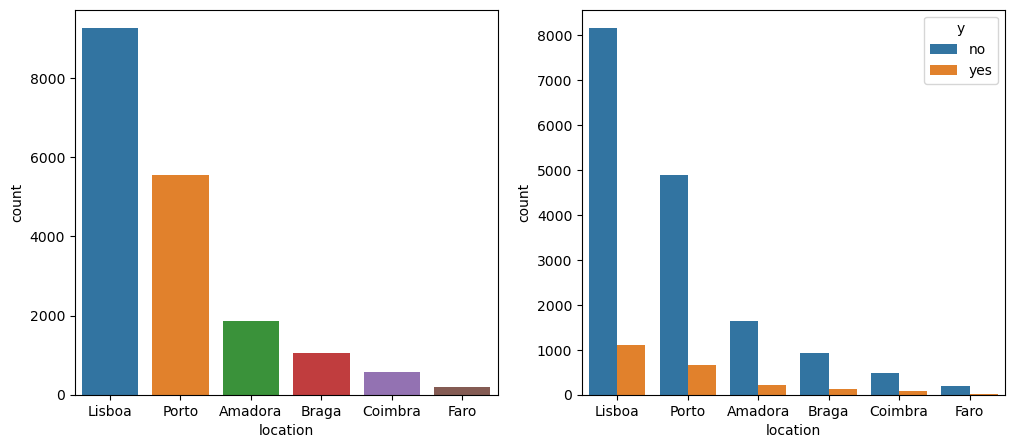

In [39]:
#Apresentação do gráfico de barras com relação a localização:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = "location")
plt.subplot(1,2,2)
sns.countplot(data = df, x = "location", hue = "y")
plt.show()

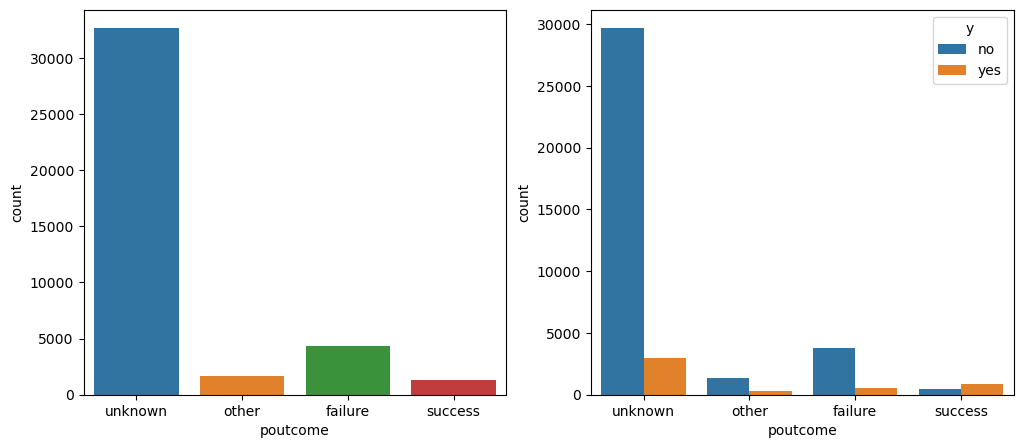

In [40]:
#Apresentação do gráfico de barras com relação ao poutcome:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = "poutcome")
plt.subplot(1,2,2)
sns.countplot(data = df, x = "poutcome", hue = "y")
plt.show()

<p>Vejamos agora estes dados em porcentagem para ver se realmente apresentam relevância.</p>

<Figure size 809x500 with 0 Axes>

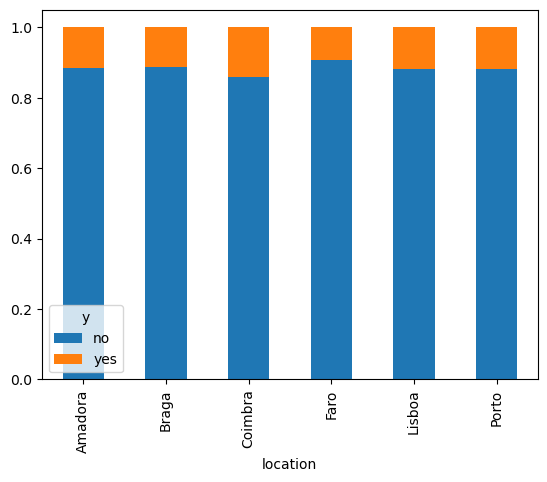

In [41]:
# Apresentação do gráfico percentil em barras da localização em relação ao y:
plt.figure(figsize = (8.09,5))
(df.groupby('location')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
plt.show()

<Figure size 809x500 with 0 Axes>

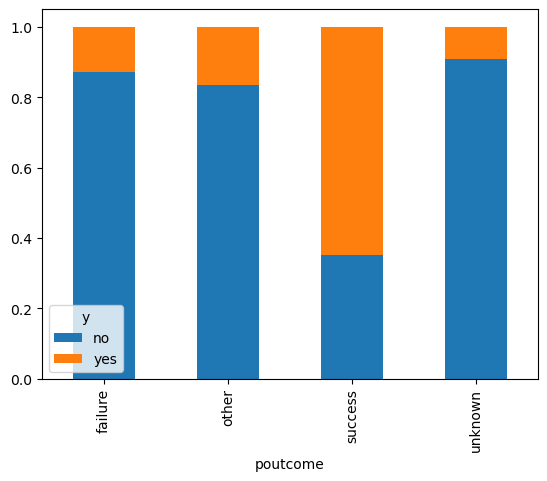

In [42]:
# Apresentação do gráfico percentil em barras da localização em relação ao y:
plt.figure(figsize = (8.09,5))
(df.groupby('poutcome')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
plt.show()

<p>No caso da localização, temos que a variável target é independente da localização, pois os casos afirmativos, ou seja, "y" = yes não ultrapassam os 20%. No caso do Poutcome, por outro lado, nos deparamos com um problema: este apresenta um grande correlação com a target, o que é evidenciado pela disparidade entre os casos de sucesso da campanha anterior e os demais. Contudo, temos uma grande falta de dados para essa feature caso não considerarmos unknown. Por esse motivo manteremos os dados unknown por enquanto. </p>

<h3> Remoção de dados fora de intervalo </h3>

<p> faz parte de uma limpeza de dados remover aqueles cuja informação seria considerada impossível. Vamos observar, por exemplo, a feature "idade":</p>

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='age'>

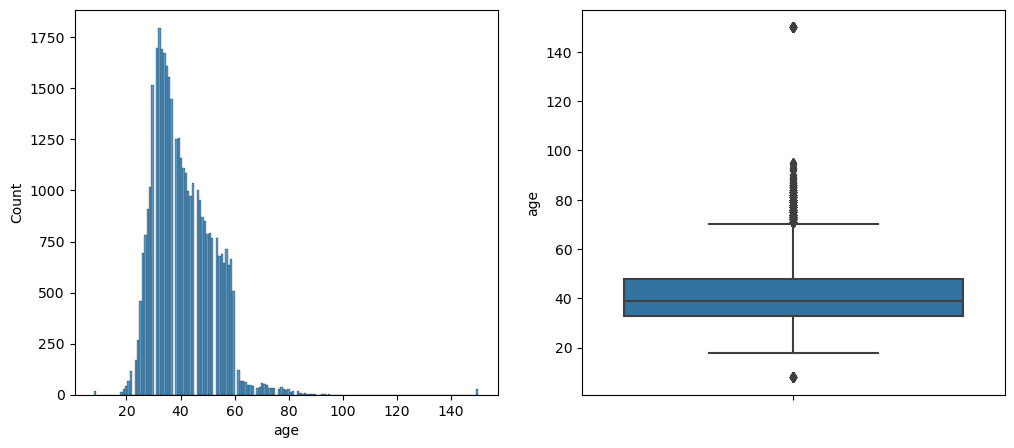

In [43]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(data = df, x = "age")
plt.subplot(1,2,2)
sns.boxplot(data = df, y = 'age')

<p> É visível que em alguns dos dados a idade é dita como maior que 140, o que é um absurdo. Esses valores, portanto, são considerados fora do intervalo de idade aceitável. podemos deletar esses valores por enquanto. </p>

In [44]:
df_overage = df[df['age']>140] #criando un dataframe apenas com pessoas cuja idade é maior que 140
df_overage

,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1471,150.0,services,single,secondary,NaN,no,150.0,no,no,cellular,13,apr,75000,3.0,-1,0.0,unknown,no
4760,150.0,management,single,tertiary,Lisboa,no,1351.0,no,n,cellular,11,mar,228,1.0,91,1.0,failure,no
4899,150.0,technician,married,secondary,NaN,no,7696.0,yes,no,cellular,20,nov,386,2.0,-1,0.0,unknown,no
6237,150.0,admin.,divorced,secondary,NaN,no,454.0,yes,n,cellular,18,nov,165,1.0,131,1.0,failure,no
11310,150.0,services,single,secondary,NaN,no,1239.0,yes,n,cellular,5,may,60,NaN,347,1.0,failure,no
11452,150.0,blue-collar,married,primary,NaN,no,3109.0,no,no,cellular,29,jun,295,1.0,287,4.0,success,yes
14372,150.0,blue-collar,married,primary,Lisboa,no,3370.0,yes,no,cellular,20,nov,156,4.0,-1,0.0,unknown,no
14571,150.0,blue-collar,married,secondary,NaN,no,NaN,yes,no,telephone,17,oct,24,1.0,-1,0.0,unknown,no
15221,150.0,unemployed,married,tertiary,Lisboa,no,259.0,no,yes,cellular,21,nov,229,2.0,-1,0.0,unknown,no
15299,150.0,management,married,tertiary,NaN,no,9.0,yes,n,cellular,22,jul,82,3.0,-1,0.0,unknown,no


<p>É possível observar que todas as idades maiores que 140 possuem o mesmo valor: 150. Isso deve ter ocorrido devido a algum erro durante a coleta dos dados. Vamos apagá-los por enquanto. </p>

In [45]:
df['age'] = df['age'].replace({150: np.nan})

<p> Agora vamos checar, como fazem suspeitar o gráfico de barras e o boxplot, se existem idades menores que 18 anos, tais que se classificariam como fora do intervalo aceitável:

In [46]:
df_underage = df[df['age']<18] #criando un dataframe apenas com pessoas cuja idade é menor que 18
df_underage#visualizando esse dataframe

,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1384,8.0,blue-collar,divorced,primary,NaN,no,21.0,yes,no,cellular,4,feb,166,2.0,-1,0.0,unknown,no
4849,8.0,technician,single,tertiary,Lisboa,no,0.0,yes,no,unknown,7,may,104,2.0,-1,0.0,unknown,no
5335,8.0,management,single,tertiary,Porto,no,334.0,no,no,cellular,14,aug,144,2.0,-1,0.0,unknown,no
6662,8.0,technician,single,tertiary,NaN,no,411.0,no,n,cellular,22,oct,127,3.0,149,2.0,failure,yes
7207,8.0,housemaid,married,primary,NaN,no,994.0,no,yes,cellular,28,jul,1339,3.0,-1,0.0,unknown,no
8198,8.0,management,divorced,tertiary,NaN,no,224.0,yes,no,cellular,5,may,106,1.0,-1,0.0,unknown,no
9251,8.0,retired,married,secondary,NaN,no,289.0,no,no,cellular,10,jul,226,1.0,-1,0.0,unknown,no
9971,8.0,technician,married,tertiary,Porto,no,104.0,no,no,cellular,14,aug,244,2.0,-1,0.0,unknown,no
15781,8.0,technician,divorced,tertiary,Lisboa,no,568.0,yes,no,unknown,24,oct,112,1.0,-1,0.0,unknown,yes
16295,8.0,retired,married,tertiary,Lisboa,no,6108.0,yes,n,cellular,17,jul,796,2.0,-1,0.0,unknown,no


<p> Elas existem! Temos vários dados cuja a idade é 8, o que não deveria acontecer. Não só isso como as profissões excluem a possibilidade de "contas kids" existirem nesse banco. Por enquanto vamos deletar esses valores também: </p>

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='age'>

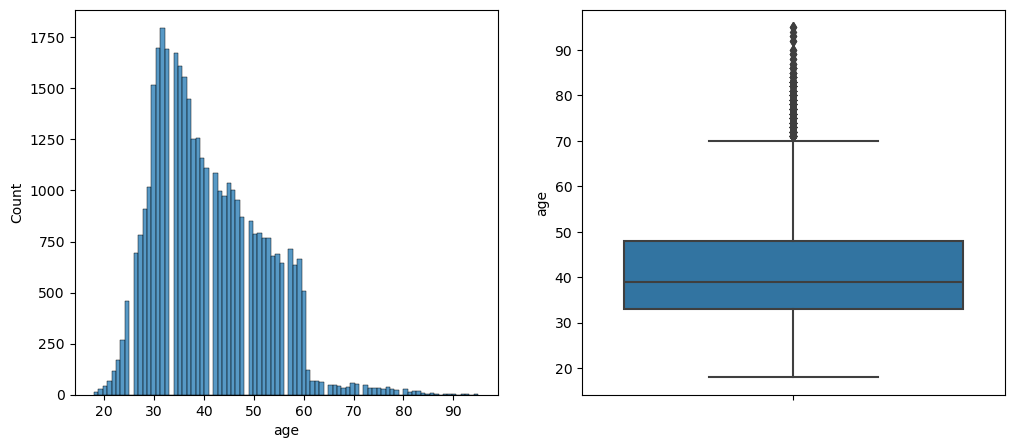

In [47]:
df['age'] = df['age'].replace({8: np.nan})
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(data = df, x = "age")
plt.subplot(1,2,2)
sns.boxplot(data = df, y = 'age')

<p> Agora os dados parecem muito mais confiáveis! </p>

<p> Contudo, o que fazemos com os espaço deixado pelos dados deletados? </p>

<p> Como o restante das features deixados por aquela pessoa estão intactas e ainda podem ser úteis, vamos imputar a moda dos demais valores aos dados faltantes a fim de manter a funcionalidade do dataset: </p>

In [48]:
df['age'] = df['age'].replace({np.nan: df['age'].mode().values})#aplicando a moda aos valores faltantes

<p> lembrando que, a partir de agora, o gráfico de barras parecerá estranho. Isso ocorre pois haviam, antes dessa limpeza, ainda mais dados faltantes na feature "age", os quais foram todos definidos pela moda:

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

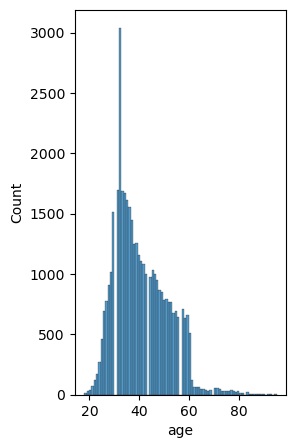

In [49]:
plt.figure(figsize = (6,5))
plt.subplot(1,2,1)
sns.histplot(data = df, x = "age")

<p> Contudo, isso não retira a funcionalidade do dataset, muito pelo contrário: agora com valores valores reais de idade para todas as pessoas, esses dados poderão ser utilizados com mais liberdade. </p>
<p> Faremos o mesmo com as demais features numéricas: </p>

In [50]:
df['previous'] = df['previous'].replace({275: np.nan})
df['previous'] = df['previous'].replace({np.nan: df['previous'].mode().values})
df['campain'] = df['campaign'].replace({np.nan: df['campaign'].mode().values})


<h3>Relação entre features categóricos e o resultado da campanha </h3>

<p>Quando se trata de análise de dados, é comum a utilização dos mais diversos gráficos em busca da melhor vizualização das relações entre as features.</p>

<p> Como estamos interessados na relação das features com o sucesso da campanha, podemos analisar por meio de gráficos percentis aquelas que são categóricas a fim de encontrar maiores ou menores incidências de "yes" na feature "y", assim como já fizemos com o "poutcome" e o "location". Começaremos com "housing" e "loan" com fins de demosntração: </p>

<Axes: xlabel='loan'>

<Figure size 2000x500 with 0 Axes>

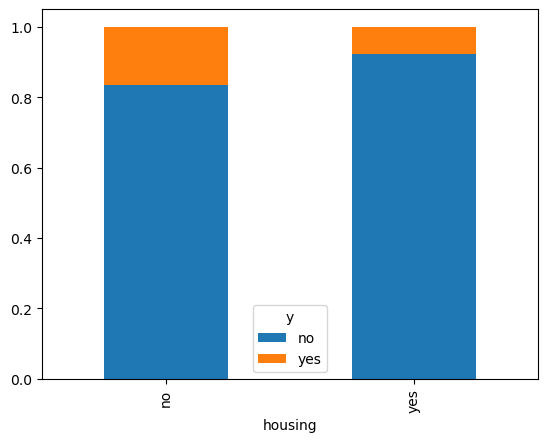

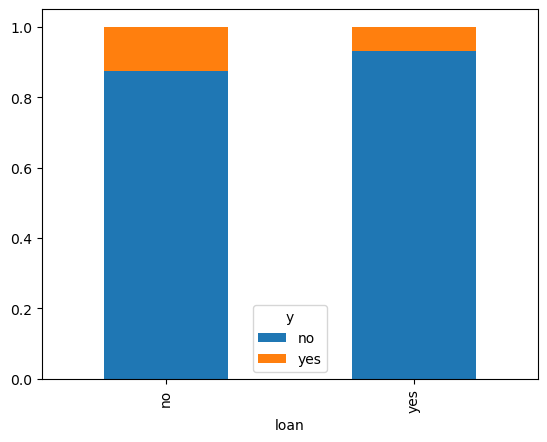

In [51]:
df_loan_corrected = df.copy() #copiando df, pois este irá ser alterado
df_loan_corrected['loan'] = df_loan_corrected['loan'].replace({'y': 'yes', 'n': 'no'})
plt.figure(figsize = (20,5))
(df.groupby('housing')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
(df_loan_corrected.groupby('loan')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)

<p> Esses gráficos reevelam que, seja um empréstimo ativo ou habitacional, pessoas que não o possuem têm maior tendência a contratar o serviço do banco, informação que será útil para o treinamento de nosso algorítmo. A disparidade observada no gráfico pode parecer pequena. Contudo, esta advém de uma relação real entre as features, tendo em vista que o tamanho do dataset não toleraria esse tipo de coincidência. </p>

<Figure size 809x500 with 0 Axes>

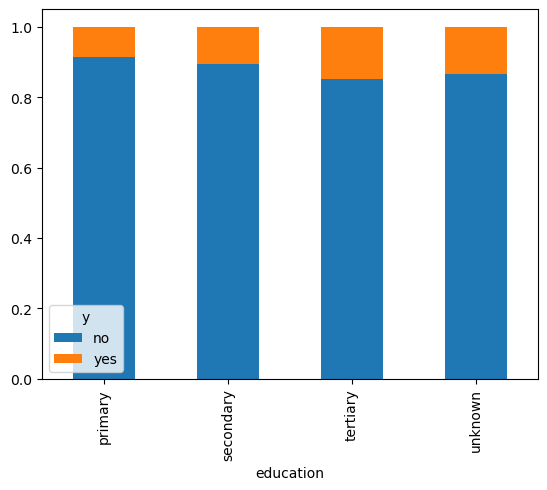

<Figure size 809x500 with 0 Axes>

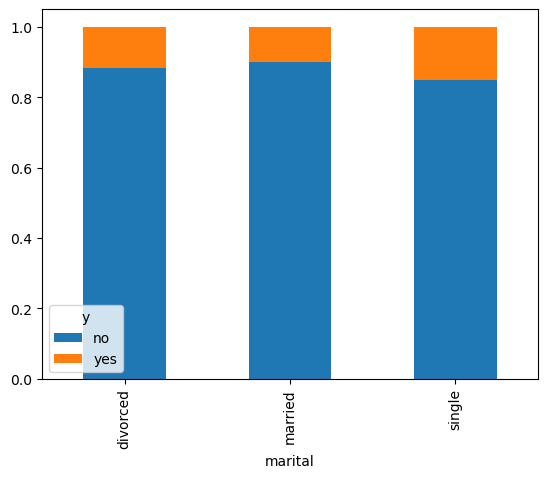

<Figure size 809x500 with 0 Axes>

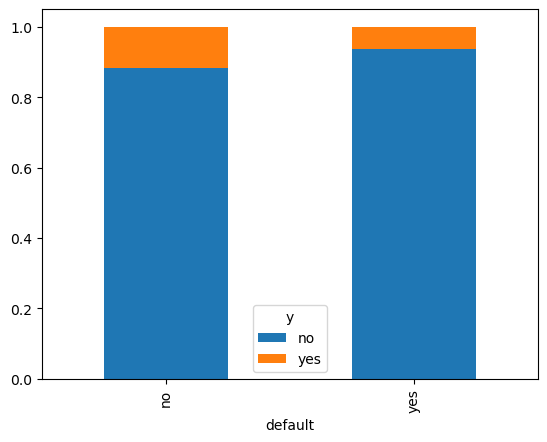

In [52]:
plt.figure(figsize = (8.09,5))
(df.groupby('education')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
plt.show()
plt.figure(figsize = (8.09,5))
(df.groupby('marital')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
plt.show()
plt.figure(figsize = (8.09,5))
(df.groupby('default')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
plt.show()

<p> Dessa vez analisando o nivel de escolaridade, temos que quanto maior o mesmo, maior a chance do banco ser contratado.</p>
<p> No caso do estado civil, pessoas com maior tendência a contratar o serviço são aquelas sem um cônjuge. </p>
<p> No Default, ou seja, possessão de crédito de inadimplência, vemos que pessoas sem crédito têm mais chances de contratar o banco. </p>

<Figure size 809x500 with 0 Axes>

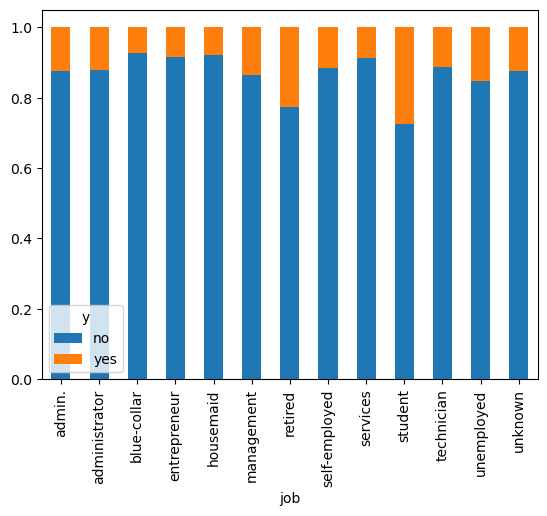

In [53]:
plt.figure(figsize = (8.09,5))
(df.groupby('job')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
plt.show()

<p> Quando se trata do trabalho exercido pelo cliente, é observado que aposentados e estudantes são aqueles mais prováveis de contratar o banco. As profissões que menos contratam são: colarinho azul, empregado doméstico, empreendedor e serviços.</p>

<h3> Trabalhando com o momento da campanha </h3>

<p> É possível que o momento da campanha influencie as chances dela ser bem sucedida. Por isso precisamos organizar o dataset para que essa influência possa se tornar mais fácil de vizualizar. Caso não façamos isso, os meses estarão na ordem errada, atrapalhando a análise: </p>

<Figure size 1200x500 with 0 Axes>

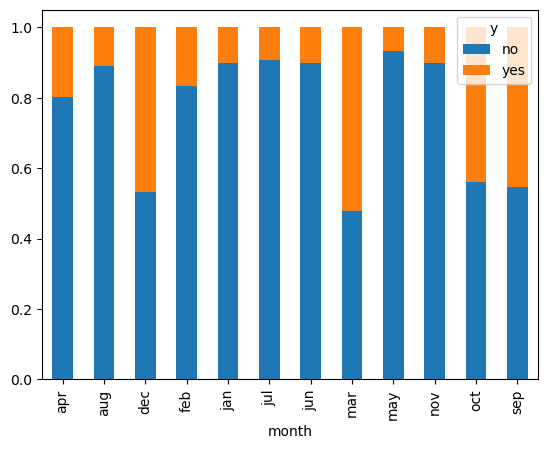

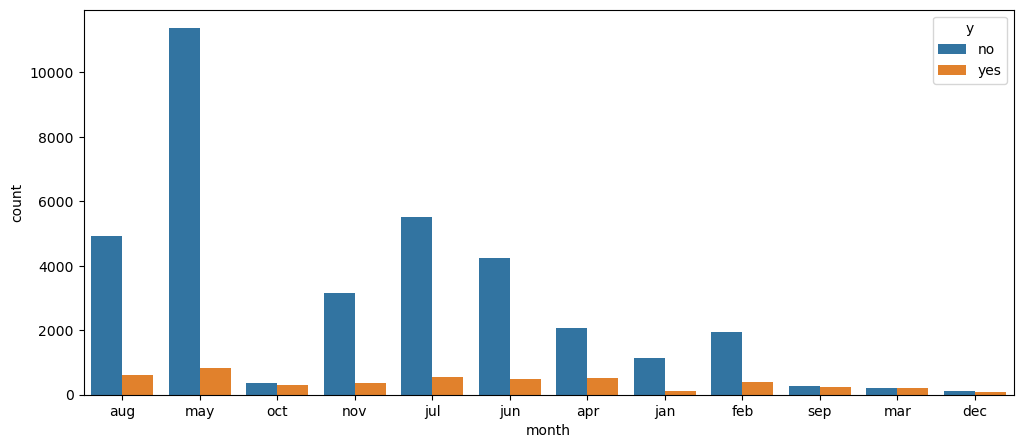

In [54]:
#Caso não façamos isso, os meses estarão na ordem errada, atrapalhando a analise
plt.figure(figsize = (12,5))
(df.groupby('month')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
plt.show()
plt.figure(figsize = (12,5))
sns.countplot(data = df, x = "month", hue = "y")
plt.show()

<p> Para isso, vamos transformar a coluna "month" em uma feature numérica, visto que, sendo descrita pelo dataset pelo nome do mês, ela se categoriza como uma categórica e dificulta uma devida vizualização. </p>

In [55]:
df = df.replace({
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
})

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19092\1883841634.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


<Figure size 1200x500 with 0 Axes>

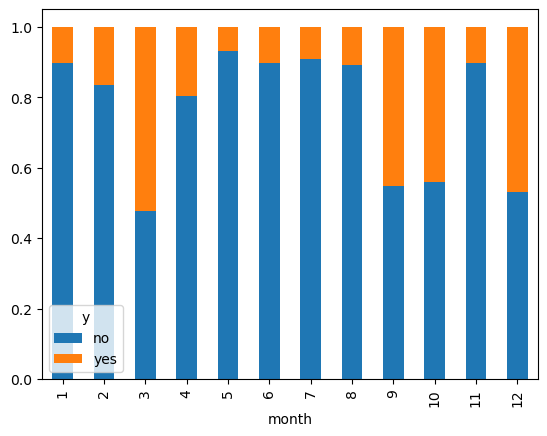

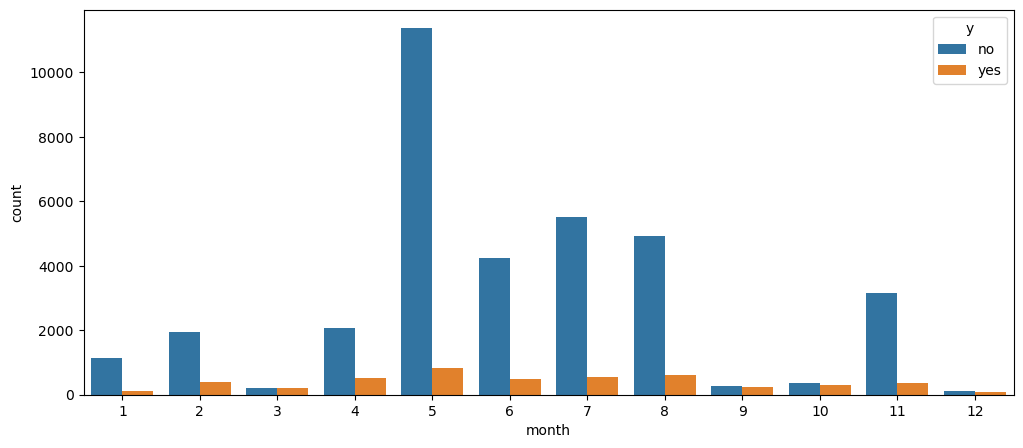

In [56]:
#checar se está funcionando via gráfico percentil de barras:
plt.figure(figsize = (12,5))
(df.groupby('month')['y'].value_counts(normalize=True)
   .unstack('y').plot.bar(stacked=True)
)
plt.show()
plt.figure(figsize = (12,5))
sns.countplot(data = df, x = "month", hue = "y")
plt.show()

<p> Está funcionando! Agora sabemos os meses com maior taxa de contratação, assim como o período do ano nos quais se fazem mais ligações. </p>

<p> Quanto à feature "dia", devido ao fato que poderia ser um dia de qualquer mês do jeito que ela se apresenta, ela não é útil em nossa análise. Vamos, portanto, deletá-la: </p>

In [57]:
df = df.drop(columns=["day"])
df.head(3)

,age,job,marital,education,location,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y,campain
0,41.0,management,single,tertiary,NaN,no,4522.0,no,no,cellular,8,55,1.0,-1,0.0,unknown,no,1.0
1,42.0,blue-collar,married,primary,NaN,yes,398.0,yes,n,unknown,5,251,4.0,-1,0.0,unknown,no,4.0
2,26.0,student,single,secondary,Lisboa,no,706.0,no,no,unknown,10,118,1.0,105,2.0,other,no,1.0


<h3> Lidando com outliers </h3>

<p> Previamente removemos valores que, por serem muito grandes ou pequenos, não faziam sentido dado o contexto da feature e por isso foram removidos. Mas o que fazer quando o valor, apesar de ser muito diferente dos demais, é verdadeiro? </p>

Esse tipo de valor, conhecido como outlier, deve ser mudado para que não atrapalhe a análise do algorítmo. No caso de um K-nearest neighbor, por exemplo, um outlier faz com que diferenças significativas (como entre 10 e 100) sejam ofuscadas pela grande e singular diferença derivada do outilier (como entre 10 e 100000).

<p> Para resolver esse problema e manter o caráter grande dos outliers, criaremos um intervalo limitante na feature e transormaremos outliers grandes e pequenos no máximo e mínimo do intervalo, respectivamente. Primeiramente demonstraremos isso com a feature "balance": </p>

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


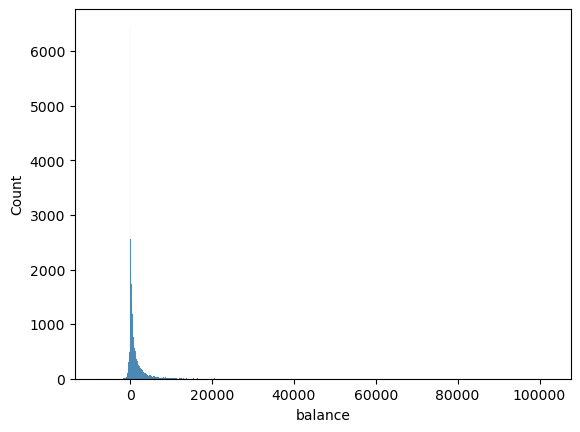

In [58]:
sns.histplot(data = df, x = "balance")
plt.show()

<p> Como podemos ver, o gráfico é fortemente prejudicado pelos outliers assim como serão os algorítimos os quais utilizarem dessa feature. Vamos aplicar a técnica descrita anteriormente, sendo o intervalo arbitrariamente definido como entre -2000 e 10000: </p>

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


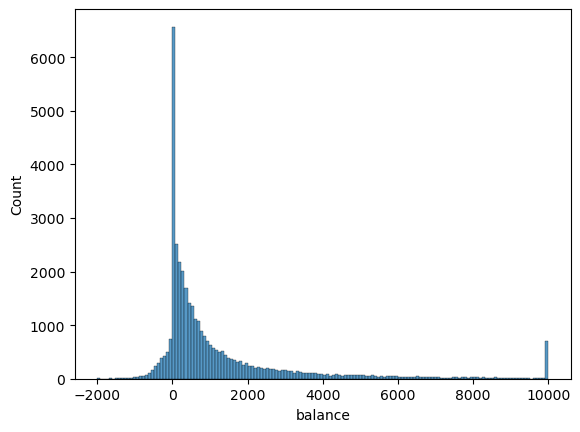

In [60]:
df['balance'] = df['balance'].apply(lambda x: 10000 if x > 10000 else x)
df['balance'] = df['balance'].apply(lambda x: -2000 if x < -2000 else x)
sns.histplot(data = df, x = "balance")
plt.show()